## __APPSTAT_01. <br>Простейшая теория вероятностей__
***

In [186]:
from math import comb, perm, factorial, ceil
from itertools import product, permutations, combinations, combinations_with_replacement, chain
from operator import mul
from collections import defaultdict
from random import sample
from fractions import Fraction
from sympy import FiniteSet, PowerSet, Rational, Symbol, Eq, Sum, oo
from sympy.stats import Die, Coin, Binomial, density, P
from scipy.stats import binom
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns 

### __Базовые операции над множествами в python__
__Задача__. _На [диаграмме Венна](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%B5%D0%BD%D0%BD%D0%B0) для 3 множеств занумеруйте сегменты, соотнесите их с соответствующими множествами и с помощью [операций над множествами в python](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) определите, какие из приведенных равенств являются верными_.

$
(A \cup B) \setminus C = (A \setminus C) \cup (B \setminus C)
\\ (A \cap B) \cup C = (A \cap C) \cup (B \cap C)
\\ (A \cap B) \setminus C = (A \setminus C) \cap B
\\ (A \cap B) \cup C = (A \cup C) \cap (B \cup C)
$

__Решение__. На диаграмме Венна для 3 множеств произвольно занумеруем сегменты:

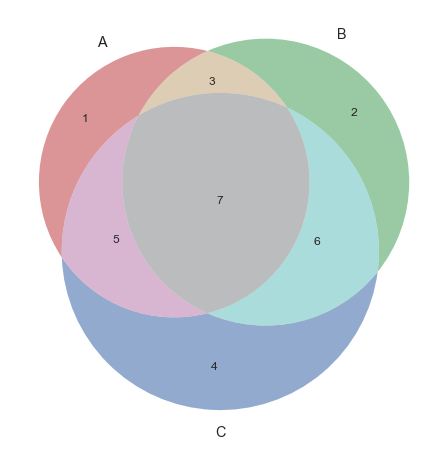

In [207]:
plt.figure(figsize=(8, 8))
venn3(subsets=(range(1, 8)), set_labels=('A', 'B', 'C'), alpha=.6)
plt.show()

Выпишем получившиеся множествa. Порядок обхода элементов, разумеется, значения не имеет, поскольку множество это неупорядоченная коллекция.

In [3]:
A = {1, 3, 7, 5}
B = {3, 2, 6, 7}
C = {5, 7, 6, 4}

Символ объединения $\cup$ (union) читается как _cup_, "кружка". $\textbf |$ (сложение, логическое _или_) это _pipe_, "труба". Символ пересечения $\cap$ (intersection) читается как _cap_, "крышка", "колпачок". $\&$ (умножение, логическое _и_) это амперсанд. Бэкслэш $\backslash$ (difference, разность) в контексте множеств можно называть вычитанием, минусом, _setminus_.
<br>С помощью операций над множествами протестируем истинность заданных логических высказываний:

In [4]:
(A | B) - C == (A - C) | (B - C)  # True

True

In [5]:
(A & B) | C == (A & C) | (B & C)  # False

False

In [6]:
(A & B) - C == (A - C) & B  # True

True

In [7]:
(A & B) | C == (A | C) & (B | C)  # True

True

Это значительно проще, чем рисовать круги и заштриховывать области, не так ли? Инициализация - в смысле исходного моделирования и оживления объектов - может быть до известной степени творческой, если не нарушает свойств и поведения моделируемых объектов. 

### __Моделирование простейших вероятностных пространств__

[Прямое (декартово) произведение](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D1%8F%D0%BC%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5)

In [8]:
# пространство элементарных исходов эксперимента 2-кратного подбрасывания
# правильного тетраэдра, в вершинах которого написаны числа 1, 2, 3, 4
omega = set(product(range(1, 5), range(1, 5)))  # заменяет конструкцию "цикл в цикле"
omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)}

In [9]:
# то же средствами sympy
tetrahedron = FiniteSet(*range(1, 5))
set(tetrahedron**2)

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)}

In [10]:
# если важен только состав элементов
set(combinations_with_replacement(range(1, 5), 2))

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)}

__Пример__. Пусть случайный эксперимент состоит в подбрасывании двух тетраэдров. Ответим на несколько вопросов.

_Из скольки равновозможных элементарных исходов состоит пространство элементарных исходов данного эксперимента?_
<br>Воспользуемся пространством элементарных исходов __`omega`__, созданным выше:

In [11]:
len(omega)  # 4 * 4 = 16

16

_Из скольки элементарных исходов состоит событие $A$ - "сумма выпавших чисел равна 7"_?
<br>Выделим из __`omega`__ исходы, благоприятствующие событию $A$:

In [12]:
# с помощью list comprehension и условия
valid = [pair for pair in omega if sum(pair) == 7]
valid  # [(3, 4), (4, 3)]

[(3, 4), (4, 3)]

In [13]:
len(valid)  # событие A состоит из 2 элементарных исходов

2

In [14]:
# то же с помощью filter и анонимной функции
valid = list(filter(lambda pair: sum(pair) == 7, omega))
valid  # [(3, 4), (4, 3)]
len(valid)  # 2

2

_Из скольки элементарных исходов состоит событие $B$ - "произведение выпавших чисел кратно трем"_?
<br>Выделим из __`omega`__ исходы, благоприятствующие событию $B$:

In [15]:
# с помощью list comprehension и условия
valid = [pair for pair in omega if not mul(*pair) % 3]
valid  # [(3, 4), (3, 1), (4, 3), (2, 3), (3, 3), (3, 2), (1, 3)]

[(3, 4), (3, 1), (4, 3), (2, 3), (3, 3), (3, 2), (1, 3)]

In [16]:
len(valid)  # событие B состоит из 7 элементарных исходов

7

C помощью __`filter`__ решим, взяв во внимание, что на тетраэдре нет чисел, кратных трем, больше 3, а значит, пара, произведение которой кратно трем, должно содержать тройку.

In [17]:
# с помощью filter и анонимной функции
valid = list(filter(lambda pair: 3 in pair, omega))
valid  # [(3, 4), (3, 1), (4, 3), (2, 3), (3, 3), (3, 2), (1, 3)]
len(valid)  # 7

7

__Пример__. _Пусть случайный эксперимент заключается в двукратной стрельбе по мишени, а вероятности элементарных исходов $\omega_1$ — "попал оба раза", $\omega_2$ — "первый раз попал, а второй промахнулся", $\omega_3$ — "первый раз промахнулся, а второй попал" и $\omega_4$ — "оба раза промахнулся" определены следующим образом: $p_1=\frac{9}{16}$, $p_2=p_3=\frac{3}{16}$, $p_4=\frac{1}{16}$._
<br>_Чему равна вероятность события $A$ — "стрелок хотя бы один раз попал по мишени"?_

In [18]:
# вероятности элементарных исходов
p = [9/16, 3/16, 3/16, 1/16]

Во-первых, проверим, возможно ли такое вероятностное пространство:

In [19]:
sum(p) == 1  # True: да, возможно

True

Событию $A$ благоприятствуют исходы, когда стрелок попал ровно один раз - исходы $\omega_2$ и $\omega_3$, и когда стрелок попал оба раза - исход $\omega_1$. По правилу суммы:

In [20]:
pA = sum(p[:3])
pA  # 0.9375

0.9375

Либо через вычитание из вероятности достоверного события, единицы, вероятности противоположного события $\omega_4$: 

In [21]:
pA = 1 - p[-1]
pA  # 0.9375

0.9375

[Булеан](https://ru.wikipedia.org/wiki/%D0%91%D1%83%D0%BB%D0%B5%D0%B0%D0%BD)

In [22]:
# итератор средствами стандартной библиотеки
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [23]:
# то же средствами sympy
PowerSet(FiniteSet(*range(1, 4))).rewrite(FiniteSet)

FiniteSet(EmptySet, {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3})

In [24]:
# fair/честные/правильные монеты готовым классом sympy
# H - heads/орел, T - tails/решка
C1, C2 = Coin('C1'), Coin('C2')
density(C1).dict  # {T: 1/2, H: 1/2}, словарь "исход: вероятность исхода"

{H: 1/2, T: 1/2}

In [25]:
# симуляция 2-кратного подбрасывания правильной монеты готовым классом sympy
density(C1+C2).dict  # {2*H: 1/4, H + T: 1/2, 2*T: 1/4}

{2*H: 1/4, H + T: 1/2, 2*T: 1/4}

In [26]:
# unfair coin/нечестная/неправильная монета готовым классом sympy
C3 = Coin('C3', Rational(3, 4))
density(C3).dict  # {T: 1/4, H: 3/4}

{H: 3/4, T: 1/4}

In [27]:
# симуляция 5-кратного подбрасывания правильной монеты биномиальным распределением
n = Symbol('n', positive=True, integer=True)
X = Binomial('X', n, Rational(1, 2), 'Орел', 'Решка')
density(X).dict.subs(n, 5).doit()
# {5*Решка: 1/32,
#  Орел + 4*Решка: 5/32,
#  2*Орел + 3*Решка: 5/16,
#  3*Орел + 2*Решка: 5/16,
#  4*Орел + Решка: 5/32,
#  5*Орел: 1/32}

{5*Решка: 1/32,
 Орел + 4*Решка: 5/32,
 2*Орел + 3*Решка: 5/16,
 3*Орел + 2*Решка: 5/16,
 4*Орел + Решка: 5/32,
 5*Орел: 1/32}

__Пример__. Пусть бросается две правильные ("честные") шестигранные игральные кости (_fair dice_). Ответим на несколько вопросов.

_Какова вероятность события $A$ - "сумма выпавших очков равна 8"?_
<br>Создадим игральные кости как объекты класса __`sympy.stats.Die`__:

In [28]:
D1, D2 = Die('D1', 6), Die('D2', 6)
density(D1).dict  # {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

In [29]:
# распределение вероятностей дискретной случайной величины - 
# суммы выпавших очков:
# {2: 1/36, 3: 1/18, 4: 1/12, 5: 1/9, 6: 5/36, 7: 1/6,
#  8: 5/36, 9: 1/9, 10: 1/12, 11: 1/18, 12: 1/36}
dA = density(D1+D2).dict
dA

{2: 1/36,
 3: 1/18,
 4: 1/12,
 5: 1/9,
 6: 5/36,
 7: 1/6,
 8: 5/36,
 9: 1/9,
 10: 1/12,
 11: 1/18,
 12: 1/36}

In [30]:
# вероятность события A - "сумма выпавших очков равна 8"
dA[8]  # 5/36, обращение по ключу

5/36

Дополнительно:

In [31]:
# вероятность события "сумма выпавших очков больше 8"
P(D1+D2 > 8)  # 5/18

5/18

_Какова вероятность события $B$ - "произведение выпавших очков равно 8"?_

In [32]:
# распределение вероятностей дискретной случайной величины - 
# произведения выпавших очков:
# {1: 1/36, 2: 1/18, 3: 1/18, 4: 1/12, 5: 1/18, 6: 1/9, 
#  8: 1/18, 10: 1/18, 12: 1/9, 9: 1/36, 15: 1/18, 18: 1/18, 
#  16: 1/36, 20: 1/18, 24: 1/18, 25: 1/36, 30: 1/18, 36: 1/36}
dB = density(D1*D2).dict
dB

{1: 1/36,
 2: 1/18,
 3: 1/18,
 4: 1/12,
 5: 1/18,
 6: 1/9,
 8: 1/18,
 10: 1/18,
 12: 1/9,
 9: 1/36,
 15: 1/18,
 18: 1/18,
 16: 1/36,
 20: 1/18,
 24: 1/18,
 25: 1/36,
 30: 1/18,
 36: 1/36}

In [33]:
# вероятность события B - "произведение выпавших очков равно 8"
dB[8]  # 1/18, обращение по ключу

1/18

Дополнительно:

In [34]:
# вероятность события "произведение выпавших очков нечетно"
P(Eq(D1*D2 % 2, 1))  # 1/4

1/4

_Какова вероятность события $C$ - "сумма выпавших очков больше их произведения"?_

In [35]:
# вероятность события C - "сумма выпавших очков больше их произведения"
P(D1+D2 > D1*D2)  # 11/36

11/36

***

### __Комбинаторика__

Комбинаторные функции и итераторы в стандартной библиотеке python:
<br>[модуль __`math`__](https://docs.python.org/3/library/math.html#module-math)
| [модуль __`itertools`__](https://docs.python.org/3/library/itertools.html#module-itertools)

In [36]:
# from math import comb, perm, factorial
# from itertools import product, permutations, combinations, combinations_with_replacement

Обратите внимание на то, что объекты __`itertools`__ это итераторы. Итератор работает лишь до опустошения. Пустой итератор ничего не отдает, поэтому если в коде требуется переиспользование, дренируйте итератор коллекцией - например, списком. Более специфичные, в т.ч. комбинаторные, итераторы можно найти в библиотеке [__`more-itertools`__](https://more-itertools.readthedocs.io/en/stable/).

Ввиду быстрого переполнения памяти и низкой скорости не стоит считать сочетания, они же биномиальные коэффициенты, с помощью __`math.factorial`__ - пожалуйста, используйте либо __`math.comb`__, либо [__`scipy.special.binom`__](https://scipy.github.io/devdocs/reference/generated/scipy.special.binom.html#scipy-special-binom).

### __Разбор задач по комбинаторике__

Для каждой задачи приведено два решения: комбинаторное и моделированием вероятностного пространства в python. Важно заметить, что подобное моделирование метод, безусловно, грубый по соображениям скорости и потребляемой памяти и потому вторичный по отношению к чистому комбинаторному решению, но может выручить, когда решить элегантно не удается. Достоинство метода его интуитивная простота: сконструируйте пространство так, как вы его себе представляете, и отсеките лишнее. На примере последней комбинаторной задачи читатель увидит, как пусть и долгий, 15-секундный, но очень простой расчет кодом избавляет от необходимости вникать в существенно разные случаи внутри одного пространства событий.

__Задача №1__. _Номер в электронной очереди банка состоит из буквы $A$, $B$ или $C$ и целого числа в диапазоне от 1 до 99 включительно. Сколько человек одновременно может находиться в очереди?_

__Решение__. 3 буквы и 99 номеров. "Каждый с каждым". Это прямоугольная таблица, в которой если буквы идут по вертикали ($m=3$), то номера - по горизонтали ($n=3$), или наоборот, а элементы - номера в электронной очереди - стоят на пересечении строк и столбцов. Понятно, что количество элементов в таблице равно $m * n$.
<br>Сформируем эти комбинации явно и посчитаем их количество. 

In [86]:
pool = []

for letter in 'A', 'B', 'C':
    for number in range(1, 100):
        pool.append(f'{letter}{number}')

pool  # ['A1', 'A2', ..., 'B1', 'B2', ..., 'C98', 'C99']    

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A38',
 'A39',
 'A40',
 'A41',
 'A42',
 'A43',
 'A44',
 'A45',
 'A46',
 'A47',
 'A48',
 'A49',
 'A50',
 'A51',
 'A52',
 'A53',
 'A54',
 'A55',
 'A56',
 'A57',
 'A58',
 'A59',
 'A60',
 'A61',
 'A62',
 'A63',
 'A64',
 'A65',
 'A66',
 'A67',
 'A68',
 'A69',
 'A70',
 'A71',
 'A72',
 'A73',
 'A74',
 'A75',
 'A76',
 'A77',
 'A78',
 'A79',
 'A80',
 'A81',
 'A82',
 'A83',
 'A84',
 'A85',
 'A86',
 'A87',
 'A88',
 'A89',
 'A90',
 'A91',
 'A92',
 'A93',
 'A94',
 'A95',
 'A96',
 'A97',
 'A98',
 'A99',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 '

In [87]:
# длина списка pool
len(pool)  # 297

297

Без циклов, итератором __`itertools.product`__:

In [96]:
pairs = product(('A', 'B', 'C'), range(1, 100))
pool = list(map(lambda pair: f'{pair[0]}{pair[1]}', pairs))
pool  # ['A1', 'A2', ..., 'B1', 'B2', ..., 'C98', 'C99']

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A38',
 'A39',
 'A40',
 'A41',
 'A42',
 'A43',
 'A44',
 'A45',
 'A46',
 'A47',
 'A48',
 'A49',
 'A50',
 'A51',
 'A52',
 'A53',
 'A54',
 'A55',
 'A56',
 'A57',
 'A58',
 'A59',
 'A60',
 'A61',
 'A62',
 'A63',
 'A64',
 'A65',
 'A66',
 'A67',
 'A68',
 'A69',
 'A70',
 'A71',
 'A72',
 'A73',
 'A74',
 'A75',
 'A76',
 'A77',
 'A78',
 'A79',
 'A80',
 'A81',
 'A82',
 'A83',
 'A84',
 'A85',
 'A86',
 'A87',
 'A88',
 'A89',
 'A90',
 'A91',
 'A92',
 'A93',
 'A94',
 'A95',
 'A96',
 'A97',
 'A98',
 'A99',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 '

In [97]:
len(pool)  # 297

297

__Задача №2__. _В урне 7 белых и 5 красных шаров. Наудачу извлекается два шара. Какова вероятность события $A$ - извлеченные шары одного цвета? $B$ - разных цветов?_

__Решение__. Не будем учитывать порядок вытащенных шаров. Число способов вытащить 2 шара из 12 без возвращения и без учета порядка $\binom {12}{2}$. Какие равновозможные исходы благоприятствуют событию $A$? Это либо два вытащенных белых шара, способов это сделать $\binom {7}{2}$, либо два красных — способов это сделать $\binom {5}{2}$. Вероятность события $A$:

In [193]:
pA = (comb(7, 2) + comb(5, 2)) / comb(12, 2)
pA  # 0.4696969696969697

0.4696969696969697

In [194]:
# в виде обыкновенной дроби
Fraction(pA).limit_denominator()  # 31/66

Fraction(31, 66)

Событие $B$ - вытащенные шары разных цветов - противоположно событию $A$. Значит, вероятность события $B$: 

In [195]:
pB = 1 - pA
pB  # 0.5303030303030303

0.5303030303030303

In [196]:
pB == (66 - 31) / 66  # True

True

Продемонстрируем и независимое решение. Всего имеется $\binom {12}{2}$ способов вытащить 2 шара из 12 без возвращения и без учета порядка. Событию $B$ благоприятствуют исходы: один белый ($\binom {1}{7}$ способов), один черный ($\binom {1}{5}$ способов). Вероятность события $B$:

In [197]:
comb(7, 1) * comb(5, 1) / comb(12, 2)  # 0.5303030303030303

0.5303030303030303

__Рассмотрим эмпирическое решение, приближающее точное выше__.
<br>Из генеральной совокупности семи нулей, кодирующих белые шары, и пяти единиц, кодирующих красные шары, с помощью функции __`sample`__ (выбор без возвращения) модуля __`random`__ стандартной библиотеки будем многократно тянуть выборку из двух шаров и фиксировать цвета извлеченной пары в словаре-счетчике с целочисленным значением по умолчанию. При таком выборе обозначений событие __`event`__ - сумма пары равна 0 - соответствует паре белых шаров __`ww`__, сумма пары равна 2 - паре красных __`rr`__, сумма пары равна 1 - паре разноцветных шаров __`xy`__. Деление счетчиков событий на число итераций выбора даст вероятности соответствующих событий. Запустим функцию и посмотрим на результаты с ростом числа итераций.

In [183]:
# генеральная совокупность
population = [0]*7 + [1]*5

In [191]:
def draw_items(*, n_times: int) -> float:
    results = defaultdict(int)
    for _ in range(n_times):
        event = sum(sample(population, 2))
        if not event:
            results['ww'] += 1
        elif event == 2:
            results['rr'] += 1
        else:
            results['xy'] += 1
    for key, val in results.items():
        results[key] = val / n_times
    return results

In [198]:
draw_items(n_times=100)

defaultdict(int, {'xy': 0.56, 'ww': 0.35, 'rr': 0.09})

In [199]:
draw_items(n_times=1000)

defaultdict(int, {'xy': 0.546, 'rr': 0.155, 'ww': 0.299})

In [203]:
pB_empirical = draw_items(n_times=10_000_000)
pB_empirical

defaultdict(int, {'xy': 0.5301961, 'ww': 0.3182676, 'rr': 0.1515363})

При 10 млн итераций отклонение вероятности события $B$ от точного значения, вычисленного ранее, составляет:

In [206]:
abs(pB_empirical['xy'] - pB)

0.00010693030303032813

Аналогичный расчет читатель может проделать для события $A$. 

__Задача №3__. _В магазине было продано 21 из 25 холодильников трех марок, имеющихся в количествах 5, 7 и 13 штук. Полагая, что вероятность быть проданым для холодильника каждой марки одна и та же, найти вероятность того, что остались нераспроданными холодильники: а) одной марки; б) трех разных марок_.

__Решение__. а) Пусть событие $A$ - остались нераспроданными холодильники одной марки. Общее число способов, которыми можно получить 4 непроданных холодильника из 25, равно

In [37]:
n = comb(25, 4)
n  # 12650

12650

Число способов, которыми можно получить 4 холодильника первой марки из 5, второй марки из 7 и третьей марки из 13, соответственно равно

In [38]:
m1 = comb(5, 4)   # 5
m2 = comb(7, 4)   # 35
m3 = comb(13, 4)  # 715
print(f'{m1=}, {m2=}, {m3=}')

m1=5, m2=35, m3=715


Событию $A$ по _правилу суммы_ благоприятствует __`m1 + m2 + m3`__ случаев. Вероятность события $A$:

In [39]:
(m1 + m2 + m3) / n  # 0.059683794466403164

0.059683794466403164

б) Пусть событие $B$ - остались нераспроданными холодильники трех разных марок. Событие $B$ может произойти по одному из трех вариантов. По первому варианту событие $B$ произойдет, если останутся нераспроданными 1, 1, 2 холодильников соответственно 1-ой, 2-ой и 3-ей марок; по второму варианту - 1, 2, 1 и по третьему  варианту останутся нераспроданными 2, 1, 1 холодильников соответственно 1-ой, 2-ой и 3-ей марок. Так как до продажи имелось 5 холодильников 1-ой марки, 7 - 2-ой и 13 - 3-ей марки, то по _правилу произведения_ число случаев, благоприятствующих первому, второму и третьему вариантам, соответственно равно

In [40]:
m1 = comb(5, 1) * comb(7, 1) * comb(13, 2)  # 2730
m2 = comb(5, 1) * comb(7, 2) * comb(13, 1)  # 1365
m3 = comb(5, 2) * comb(7, 1) * comb(13, 1)  # 910
print(f'{m1=}, {m2=}, {m3=}')

m1=2730, m2=1365, m3=910


Общее число случаев, благоприятствующих событию $B$, равно __`m1 + m2 + m3`__. Вероятность события $B$: 

In [41]:
(m1 + m2 + m3) / n  # 0.39565217391304347

0.39565217391304347

__Решение моделированием вероятностного пространства__
<br>В задаче два события. Введем обобщающий характеристический признак события, __`event`__, и сведем решение к одной функции от данного признака как аргумента.

In [42]:
def task03(*, event: int) -> float:
    stock = {'a': 5, 'b': 7, 'c': 13}
    # ключи - марки/шильдики производителей, значения - начальные количества
    labels = ''.join(label * qty for label, qty in stock.items())
    # 'aaaaabbbbbbbccccccccccccc'    
    items_sold = 21  # шт. продано
    items_left = sum(stock.values()) - items_sold  # 4 шт. осталось    
    omega = list(combinations(labels, items_left))    
    valid = list(filter(lambda sequence: len(set(sequence)) == event, omega))
    return len(valid) / len(omega)

Пространство элементарных исходов __`omega`__ - список всевозможных четырехместных кортежей/комбинаций шильдиков из __`labels`__.
<br>Выделим из __`omega`__ исходы, отвечающие событиям в условии: с помощью анонимной функции __`lambda`__ фильтр отбирает из __`omega`__ те кортежи, на которых __`lambda`__ возвращает __`True`__.
<br>Что означает _среди нераспроданных четырех холодильников одна марка_? - это означает, что мощность (или длина) множества __`set`__, составленного из комбинации марок, равна единице. Аналогично _среди оставшихся три марки_: три уникальных элемента в комбинации и один, четвертый, дублирующий любой из первых трех.
<br>Так мы обобщили события одним характеристическим признаком, __`event`__, который введем в функцию именованным аргументом. Искомая вероятность события - отношение длины списка благоприятствующих комбинаций, __`valid`__, к длине списка всевозможных, __`omega`__.
<br>Сверимся с эталонным комбинаторным решением:

In [43]:
task03(event=1)  # 0.059683794466403164

0.059683794466403164

In [44]:
task03(event=3)  # 0.39565217391304347

0.39565217391304347

__Задача №4__. _В партии 100 изделий, из которых 4 - бракованные. Партия произвольно разделена на две равные части, которые отправлены двум потребителям. Какова вероятность того, что все бракованные изделия достанутся: а) одному потребителю; б) обоим потребителям поровну?_

__Решение__. а) Пусть событие $A$ - все бракованные изделия достанутся одному потребителю. Общее число способ, какими можно выбрать 50 изделий из 100, равно   

In [45]:
n = comb(100, 50)  # 100891344545564193334812497256
'{:,}'.format(n)  # '100,891,344,545,564,193,334,812,497,256'

'100,891,344,545,564,193,334,812,497,256'

Событию $A$ благоприятствуют случаи, когда из 50 изделий, отправленных одному потребителю, будет либо 46 стандартных из 96 (и все 4 бракованных) изделий, либо 50 стандартных из 96 (и 0 бракованных). Их число

In [46]:
m = comb(96, 46) * comb(4, 4) + comb(96, 50) * comb(4, 0)
m  # 11851029537373363540733989056

11851029537373363540733989056

Вероятность события $A$:

In [47]:
m / n  # 0.11746329272102468

0.11746329272102468

б) Пусть событие $B$ - в каждой партии по 2 бракованных изделия. Теперь событию $B$ будут благоприятствовать случаи, когда из 50 изделий, отправленных одному потребителю, будут 48 стандартных из 96 и 2 бракованных из 4, их число

In [48]:
m = comb(96, 48) * comb(4, 2)
m  # 38610402083197793450529618600

38610402083197793450529618600

Вероятность события $B$:

In [49]:
m / n  # 0.3826929084661043

0.3826929084661043

__Решение моделированием вероятностного пространства__

In [50]:
def task04(*, event: tuple[int, ...]) -> float:
    total = 100
    defective = 4
    mid = total / 2
    omega = list(combinations(range(total), defective))
    valid = list(filter(lambda sequence: 
        sum(element < mid for element in sequence) in event, omega))
    return len(valid) / len(omega)

Пространство элементарных исходов __`omega`__ - список четырехместных кортежей, всевозможных четверок изделий, занумерованных следующим образом: пусть первые 50, индексы [0, 49], попали к первому потребителю, оставшиеся 50, индексы [50, 99], - ко второму.
<br>Анононимная функция отбирает из __`omega`__ те четверки, количество изделий в которых, отправленных первому потребителю, находится среди значений аргумента функции __`event`__ - характеристического признака события в данной задаче. По сути, мы ищем вероятность того, что любая четверка изделий, в т.ч. та, в которой все бракованные, может попасть в диапазон индексов изделий первого потребителя. Что означает __`event=(0, 4)`__? - это означает, что количество брака, попавшего к первому потребителю, равно либо 0 - и тогда весь брак у второго потребителя, либо наоборот, все 4 бракованные изделия у первого потребителя и 0 у второго: 

In [51]:
task04(event=(0, 4))  # 0.11746329272102468

0.11746329272102468

Два бракованных изделия у первого потребителя (и два, автоматически, у второго):

In [52]:
task04(event=(2,))  # 0.3826929084661043

0.3826929084661043

__Задача №5__. _За круглым столом рассаживаются 5 мужчин и 5 женщин. Найти вероятность того, что: а) никакие два лица одного пола не сядут рядом; б) супруги сядут рядом, если эти мужчины и женщины образуют 5 супружеских пар_.

__Решение__. а) Пусть событие $A$ - никакие два лица одного пола не сядут рядом. Общее число способов рассадки 10 лиц на 10 местах определяется числом перестановок

In [53]:
n = perm(10)
n  # 3628800

3628800

Если женщины займут четные места $5!$ способами, то мужчины будут занимать нечетные места также $5!$ способами, и наоборот, т.е. число случаев, благоприятствующих событию $A$, равно

In [54]:
m = 2 * factorial(5)**2
m  # 28800

28800

Вероятность события $A$:

In [55]:
m / n  # 0.007936507936507936

0.007936507936507936

б) Пусть событие $B$ - супруги, образующие пять супружеских пар, сядут рядом. Теперь число случаев __`m`__, благоприятствующих событию $B$, определяется числом $5!$ всевозможных перестановок 5 супружеских пар, причем в каждой паре возможна перестановка мужа и жены. По правилу произведения

In [56]:
m = factorial(5) * 2**5
m  # 3840

3840

Вероятность события $B$:

In [57]:
m / n  # 0.0010582010582010583

0.0010582010582010583

__Решение моделированием, случай а)__
<br>На всех четных местах метка 0, тогда на всех нечетных - 1. И наоборот:

In [58]:
omega = list(permutations([0]*5 + [1]*5, 10))
valid = list(filter(lambda seq: sum(seq[::2]) in (0, 5), omega))
len(valid) / len(omega)  # 0.007936507936507936

0.007936507936507936

__Решение моделированием, случай б)__
<br>Пусть супруги это пары (0, 1), (2, 3), ..., (8, 9). Нас устраивают любые комбинации, в которых эти пары перемешиваются как единое целое, а также допустимы перестановки внутри пар. С точки зрения выбранной структуры это означает, что перестановки, в которых все элементы четных индексов отличаются от следующих за ними на 1 или -1, благоприятствуют интересующему случаю: муж и жена перемещаются вместе и могут следовать один за другим. Например,
<br>__`(2, 3, 1, 0, 5, 4, 6, 7, 9, 8)`__ - OK, 
<br>__`(2, 1, 3, 0, 5, 4, 6, 7, 9, 8)`__ - NOK.

In [59]:
omega = list(permutations(range(10), 10))
valid = list(filter(lambda seq: 
    all(seq[i] - seq[i+1] in (-1, 1) for i in range(0, 10, 2)), omega))
len(valid) / len(omega)  # 0.0010582010582010583

0.0010582010582010583

__Задача №6__. _В купейный вагон (9 купе по 4 места) семи пассажирам продано 7 билетов. Найти вероятности того, что пассажиры попали: а) в два купе; б) в семь купе; в) в три купе_.

__Решение__. Пусть событие $A$ - пассажиры попали в два купе. Общее число способов выбора 7 любых мест из имеющихся в вагоне 36 определяется числом сочетаний

In [60]:
n = comb(36, 7)
n  # 8347680

8347680

Для нахождения числа __`m`__ случаев, благоприятствующих событию $A$, учтем, что 2 купе из 9 можно выбрать ${9}\choose{2}$ способами, а 7 мест из имеющихся в двух купе 8 мест - ${8}\choose{7}$ способами. По правилу произведения

In [61]:
m = comb(9, 2) * comb(8, 7)
m  # 288

288

Вероятность события $A$:

In [62]:
m / n  # 3.450060376056581e-05

3.450060376056581e-05

б) Пусть событие $B$ - пассажиры попали в семь купе. 7 купе из 9 можно выбрать ${9}\choose{7}$ способами. Семь мест в семи купе можно получить, если в каждом купе выбрать по одному месту из четырех, что возможно $4^7$ способами. Общее число случаев, благоприятствующих событию $B$, по правилу произведения равно

In [63]:
m = comb(9, 7) * 4**7
m  # 589824

589824

Вероятность события $B$:

In [64]:
m / n  # 0.07065723650163878

0.07065723650163878

в) Пусть событие $D$ - пассажиры попали в три купе. 3 купе из 9 можно выбрать ${9}\choose{3}$ способами, а число способов выбора семи мест из 12 в трех купе определяется сложнее, чем в п. а) и б). Действительно, возможные варианты выбора 7 мест из 12 в трех купе следующие: 4 + 2 + 1, 3 + 3 + 1, 3 + 2 + 2, а за счет перестановок купе таких вариантов будет соответственно 6, 3 и 3. Каждый из этих вариантов по правилу произведения может быть получен числом способов соответственно

In [65]:
m1 = comb(4, 4) * comb(4, 2) * comb(4, 1)  # 24
m2 = comb(4, 3) * comb(4, 3) * comb(4, 1)  # 64
m3 = comb(4, 3) * comb(4, 2) * comb(4, 2)  # 144
print(f'{m1=}, {m2=}, {m3=}')

m1=24, m2=64, m3=144


В результате общее число случаев, благоприятствующих событию $D$, равно

In [66]:
m = comb(9, 3) * (6*m1 + 3*m2 + 3*m3)
m  # 64512

64512

Вероятность события $D$:

In [67]:
m / n  # 0.007728135242366742

0.007728135242366742

__Решение моделированием, все случаи вместе__
<br>Пространство элементарных исходов __`omega`__ - всевозможные семиместные кортежи посадочных мест вагона, пронумерованных от 1 до 36. Результаты будем складывать в словарь-счетчик __`summary`__ с целочисленным значением по умолчанию.
Для каждой комбинации сформируем "сумку" __`bag`__ - множество всех номеров купе, в которых располагаются места из данной комбинации. Поскольку __`set`__ оставляет только уникальные значения, мощность (или длина) множества __`bag`__ это количество купе, в которых располагается данная комбинация посадочных мест. Вся операция, по сути, - раскладывание комбинаций по естественным бинам, которыми являются купе. Обновим счетчик __`summary`__ длиной __`bag`__.

In [68]:
omega = combinations(range(1, 37), 7)
summary = defaultdict(int)

for combination in omega:
    bag = set()
    for element in combination:
        bag.add(ceil(element / 4))
    summary[len(bag)] += 1

summary
# defaultdict(int, 
# {2: 288, 3: 64512, 4: 1048320, 5: 3548160, 6: 3096576, 7: 589824})

defaultdict(int,
            {2: 288, 3: 64512, 4: 1048320, 5: 3548160, 6: 3096576, 7: 589824})

Мы получили словарь результатов, в котором ключи это количество купе _k_, а значения - количество исходов, благоприятствующих событию "пассажиры попали в _k штук_ купе", числители из предшествующего комбинаторного решения.

***

### __Формула Бернулли. Биномиальное распределение__

__Задача__. _Вероятность изготовления стандартной детали равна 0,8. Найти вероятности возможного числа появления бракованных деталей среди 10 отобранных_.

__Решение__. Вероятность изготовления бракованной детали $p=1-0,8=0,2$. Искомые вероятности находятся по формуле Бернулли $\binom{n}{k}p^k(1-p)^{n-k}$. Дискретная случайная величина, принимающая значения $0, 1, 2, ..., k, ..., n$ с вероятностями по формуле Бернулли, имеет биномиальный закон распределения с параметрами $n$ и $p$. Воспользуемся ее реализацией, [__`scipy.stats.binom`__](https://scipy.github.io/devdocs/reference/generated/scipy.stats.binom.html#scipy-stats-binom).

In [69]:
sns.set_theme()

In [70]:
n, p = 10, .2
rv = binom(n, p)  # rv - random variable

# pmf - probability mass function (функция вероятности)
# искомые вероятности
[rv.pmf(k) for k in range(n+1)]

[0.10737418240000006,
 0.26843545599999996,
 0.30198988800000004,
 0.20132659199999992,
 0.0880803839999999,
 0.026424115199999983,
 0.005505024000000005,
 0.000786432,
 7.372800000000001e-05,
 4.095999999999997e-06,
 1.0240000000000006e-07]

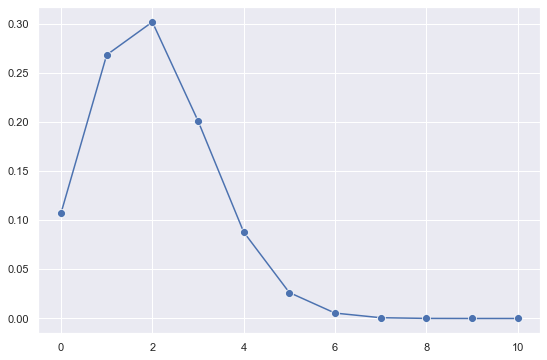

In [71]:
# полигон распределения вероятностей
k = range(n+1)
plt.figure(figsize=(9, 6))
sns.lineplot(data=rv.pmf(k), marker='o', ms=8)
plt.show()

Вывод: Вероятность появления 2 бракованных деталей максимальна при данных условиях и равна

In [72]:
rv.pmf(2)  # 0.30198988800000004

0.30198988800000004

***

### __Геометрическое распределение__

__Задача__. _Два игрока поочередно бросают игральную кость. Выигрывает тот, к которого первым выпадает "6 очков". Какова вероятность выигрыша игрока, бросающего игральную кость первым? Вторым?_

__Решение__. Число $k$ испытаний, проведенных по схеме Бернулли, с вероятностью $p$ наступления события в каждом испытании до первого положительного исхода представляет собой случайную величину ($X$), имеющую геометрическое распределение: она принимает значения $1, 2, ..., k, ...$ с вероятностями $P(X=k)=pq^{k-1}$, где $q=1-p$. Сумма ряда геометрического распределения $p+pq+...+pq^{k-1}+...=1$. Очевидно, что вероятность выигрыша игрока, бросающего игральную кость первым, равна сумме нечетных членов ряда ($k=1, 3,...$), вторым - четных. Посчитаем сумму рядов в __`sympy`__. 

Во-первых, убедимся, что $ \sum_{k=1}^{\infty} pq^{k-1} = 1$:

In [73]:
p = 1/6
q = 1 - p
k = Symbol('k')
Sum(p * q**(k-1), (k, 1, oo)).doit()  # 1

1.00000000000000

Чтобы просуммировать только нечетные элементы, умножим показатель степени при $q$ на 2:

In [74]:
# вероятность выигрыша игрока, бросающего игральную кость первым
sum_odd = Sum(p * q**(2*k-2), (k, 1, oo)).doit()
sum_odd  # 0.545454545454546

0.545454545454546

In [75]:
# в виде обыкновенной дроби
Fraction(float(sum_odd)).limit_denominator()  # 6/11

Fraction(6, 11)

In [76]:
# вероятность выигрыша игрока, бросающего игральную кость вторым
1 - sum_odd  # 0.454545454545454

0.454545454545454

In [77]:
# или сдвигом вдоль ряда
sum_even = Sum(p * q**(2*k-1), (k, 1, oo)).doit()
sum_even  # 0.454545454545455

0.454545454545455

In [78]:
sum_even == 5/11  # True

True

***